In [1]:
import pandas as pd
df = pd.read_csv('questionnaire.csv', index_col=0)
df.head()

,math,physics,english
uid,,,
1,0,4,7
2,5,2,0
3,5,1,3
4,9,1,8
5,9,1,8


In [2]:
import numpy as np
user_mat = np.random.permutation(df.index.values).reshape((10,10))

In [3]:
initial_population = []

for x in range(10):
    user_mat = np.random.permutation(range(1, 101)).reshape((10,10))
    initial_population.append(user_mat)

In [4]:
initial_population

[array([[ 50,  49,  22,  48,  58,  26,  92,  11,  88,  45],
        [ 91,  30,  65,  93,  37,  14,  34,  98,  60,   4],
        [ 51,  44,  61,  83,  38,   6,  16, 100,  12,  82],
        [  2,  99,  10,   5,  53,  52,  17,   9,  87,  81],
        [ 85,  86,  73,  23,   3,  42,  25,  96,  89,  31],
        [ 43,  24,  36,  54,  32,  28,  77,   7,  95,  33],
        [ 18,  46,  80,   8,  59,  66,  15,  90,  21,  39],
        [ 97,  71,  35,  62,  78,  75,  79,  68,  29,  94],
        [ 20,   1,  76,  19,  69,  27,  84,  41,  56,  70],
        [ 55,  63,  74,  40,  64,  67,  47,  72,  57,  13]]),
 array([[ 84,  15,  23,   7,  37,  22,  86,  99,  24,  51],
        [ 44,  56,  80,  57,  19,  81,  55,  60,  77,   5],
        [ 92,  59,  10,  90,  20,  64,  28,  21,  98,  97],
        [ 52,  17,  53,  50,  65,  30,  16, 100,  85,  78],
        [ 14,  72,  42,  68,  96,  27,  82,  93,  76,  13],
        [ 69,  67,  70,  40,  26,  75,  11,   9,  94,  18],
        [ 54,  34,  58,  12,  25,  41,

In [5]:
from scipy.spatial.distance import pdist

def calculate_interest_distance(person, *others):
    people = [df.ix[person, 0:3]]
    for other in others:
        if other:
            people.append(df.ix[other, 0:3])

    return np.average(pdist(people, 'cityblock')) if len(people) > 1 else 0

In [6]:
def get_element_safe(sequence, position):
    try:
        return sequence.item(position)
    except IndexError:
        return None

In [7]:
def calculate_chromosome_fitness(chromosome):
    fitnesses = []
    for index, gene in np.ndenumerate(chromosome):
        next_to = calculate_interest_distance(gene,
                                             get_element_safe(chromosome, (index[0], index[1] - 1)),
                                             get_element_safe(chromosome, (index[0], index[1] + 1)))
        in_front = calculate_interest_distance(gene,
                                              get_element_safe(chromosome, (index[0] + 1, index[1])))
        behind = calculate_interest_distance(gene,
                                            get_element_safe(chromosome, (index[0] - 1, index[1])))
        fitnesses.append(sum([next_to, in_front, behind]) / 3)
    return np.average(fitnesses)

In [8]:
generations = []

for chromosome in initial_population:
    generations.append({
        "generation": 0,
        "fitness": calculate_chromosome_fitness(chromosome),
        "chromosome": chromosome,
        "active": True
    })

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [9]:
generations = sorted(generations, key=lambda generations : generations['fitness'])

generations

[{'generation': 0,
  'fitness': 9.255555555555555,
  'chromosome': array([[ 58,  99,  75,  51,  83,   9,  32,  34,  88,  40],
         [ 16,  77,  47,  82,  12,  92,  69,  19,  89,  71],
         [ 61,  86,  20,  36,  44,  76,   5,  17,  53,  56],
         [ 93,  23,  10,  18,  81,  97,   4,  13,   2,   3],
         [ 98,  73,   6,  52,  27,  80,  42,  41,  84,  33],
         [  7,  60,  63,  28,  57,  49,  11,  14,   8,  78],
         [100,  85,  66,  30,  67,  24,  62,  25,  64,  54],
         [ 46,  55,  79,  95,  35,  43,  90,   1,  31,  94],
         [ 22,  91,  38,  37,  45,  87,  59,  70,  72,  96],
         [ 26,  50,  21,  15,  39,  29,  68,  74,  65,  48]]),
  'active': True},
 {'generation': 0,
  'fitness': 9.604444444444445,
  'chromosome': array([[ 75,  57,  85,  97, 100,  82,  12,  95,  63,  35],
         [ 81,  30,  36,  34,  73,  25,  90,  48,  50,  91],
         [ 60,  96,  46,  40,  26,  22,  77,  23,  53,  39],
         [ 76,  88,   3,  68,  17,  20,  16,  62,  65,  

In [10]:
import random

def recombine(mother, father):
    child = np.ones((10,10)) * -1
    # 遍历每个用户
    for index, uid in enumerate(df.index):
        if uid <= 50:
            # 如果uid <=50，则position为mother中该uid的位置
            position = np.where(mother == uid)
        else:
            # 如果uid > 50，则position为father中该uid的位置
            position = np.where(father == uid)
        
        if child[position] != -1:
            # 处理冲突
            filtered = np.where(np.equal(child, -1))
            position = random.choice(list(zip(filtered[0], filtered[1])))

        child[position] = uid

    return child

In [11]:
def mutate_chromosome(chromosome):
    first = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))
    second = (random.randrange(0, 10, 1), random.randrange(0, 10, 1))

    chromosome[first[0], first[1]], chromosome[second[0], second[1]] = chromosome[second[0], second[1]], chromosome[first[0], first[1]]
    return chromosome

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def draw_population(population, generation):
    figure, axes = plt.subplots(1, 10, figsize=(20, 3))

    for index, chromosome in enumerate(population):
        ids = chromosome
        axes[index].imshow(ids, interpolation="nearest", cmap=plt.cm.plasma)
        subplot_title = "Chromosome " + str(index)
        axes[index].set_title(subplot_title)

    plot_title = "Generation " + str(generation)
    figure.suptitle(plot_title)
    plt.show()

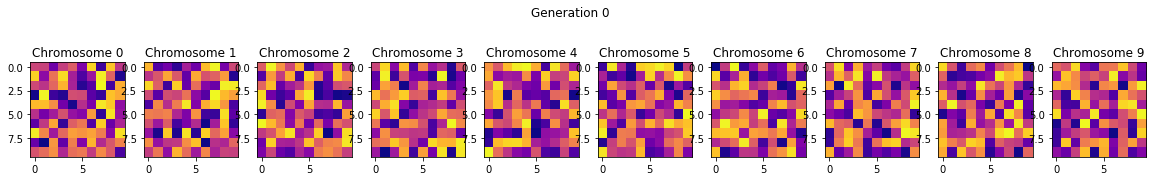

In [13]:
draw_population(initial_population, 0)

In [14]:
import copy

most_fit = []

# 当前的适应度
max_fitness = None

# 适应度最高的染色体
fittest_chromosome = None

In [15]:
### 从generations取出某一代的所有染色体，并排序
def get_chromosomes_in_generation(generations, generation_num):
    # Get only the chromosomes in this generation
    generation = list(filter(lambda k: k['generation'] == generation_num, 
                             generations))
    return sorted(generation, key=lambda k: k['fitness'])


### 更新 most_fit / max_fitness / fittest_chromosome 
def sort_chromosomes(generation, most_fit):
    max_fitness = generation[0]['fitness']
    most_fit.append(max_fitness)
    fittest_chromosome = generation[0]['chromosome']
    return most_fit, fittest_chromosome

In [16]:
def copy_chromosomes(generation, generations):
    new_generation = copy.deepcopy(generation)
    
    # C. 将适应度最差的两个染色体杀掉
    new_generation[-1]['active'] = False
    new_generation[-2]['active'] = False
    
    # D. 找到仍存活的染色体，并更新代数
    active = list(filter(lambda k: k['active'] == True, new_generation))
    for chromosome in active:
        chromosome['generation'] += 1
    
    # B. 将新一代染色体加入到generations中并返回
    generations.extend(active)
    return generations


def mate_chromosomes(generation, generations, generation_num):
    
    # A. 将适应度最高的两条染色体交配
    child = recombine(generation[0]['chromosome'], generation[1]['chromosome'])
    child = mutate_chromosome(child)
    generations.append({
      "active": True,
      "chromosome": child,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(child)
    })
    
    # E. 将适应度第三和第四高的两条染色体交配
    other = recombine(generation[2]['chromosome'], generation[3]['chromosome'])
    other = mutate_chromosome(chromosome)
    generations.append({
      "active": True,
      "chromosome": other,
      "generation": generation_num + 1,
      "fitness": calculate_chromosome_fitness(other)
    })
    return generations

In [17]:
def run_ga(input_generations):
    fittest = []
    max_fitness = None
    fittest_chromo = None
    for generation_num in range(50):
        if max_fitness and max_fitness < 5:
            break

        generation = get_chromosomes_in_generation(input_generations, generation_num)
        fittest, fittest_chromo = sort_chromosomes(generation, most_fit)

        input_generations = copy_chromosomes(generation, input_generations)
        input_generations = mate_chromosomes(generation, input_generations, generation_num)

        draw_population(map(lambda d: d['chromosome'], 
                        get_chromosomes_in_generation(input_generations, generation_num)), generation_num)

    return fittest, fittest_chromo

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


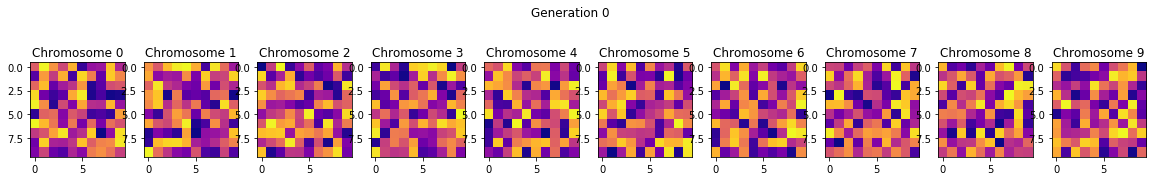

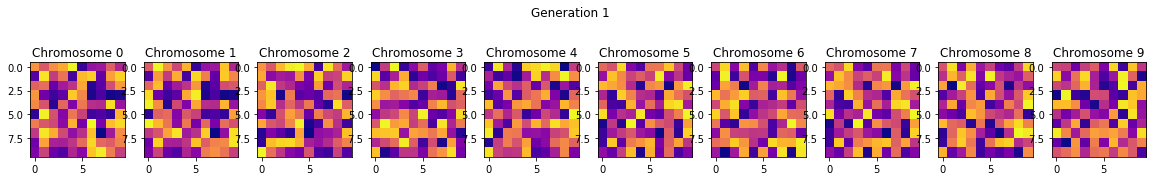

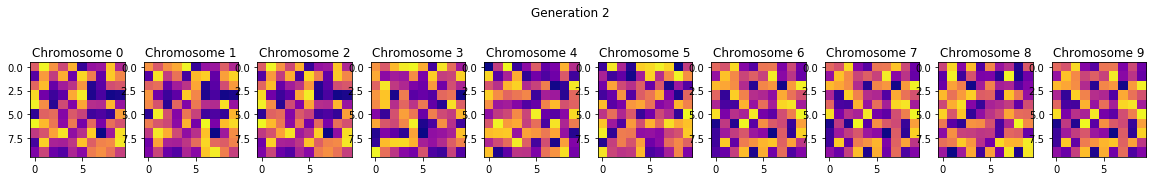

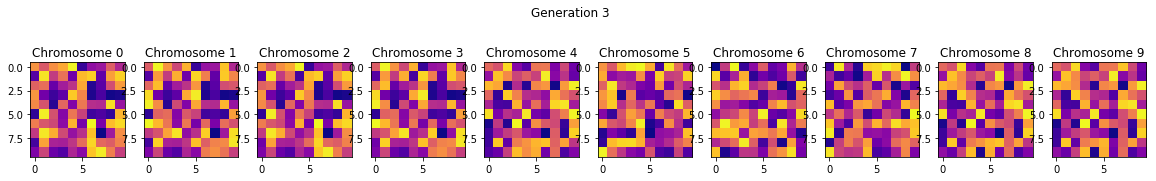

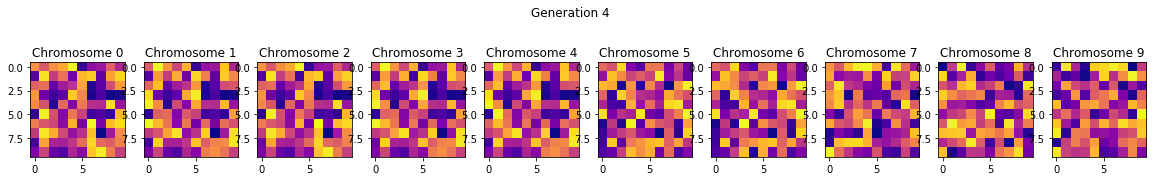

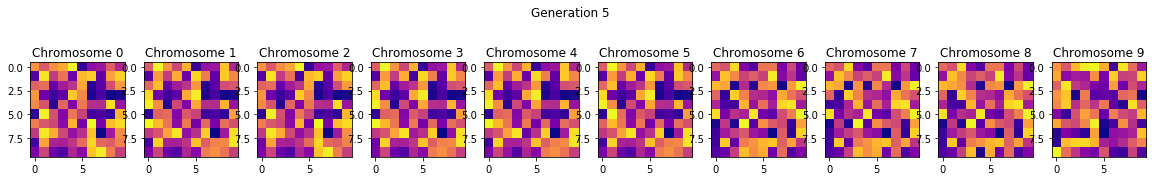

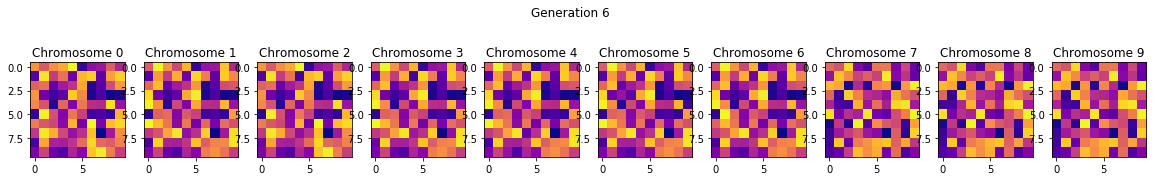

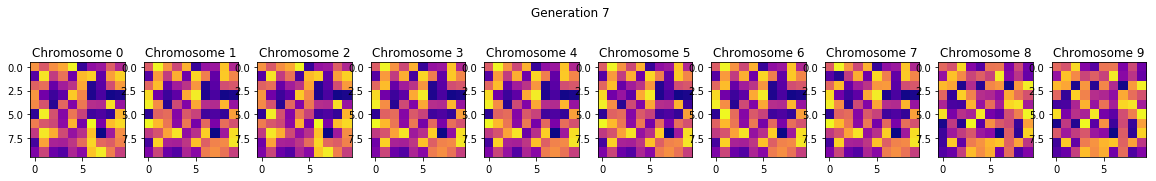

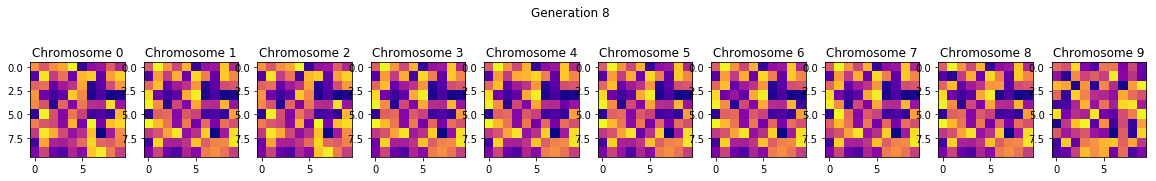

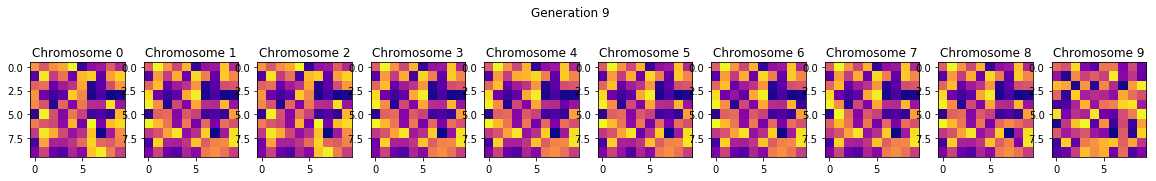

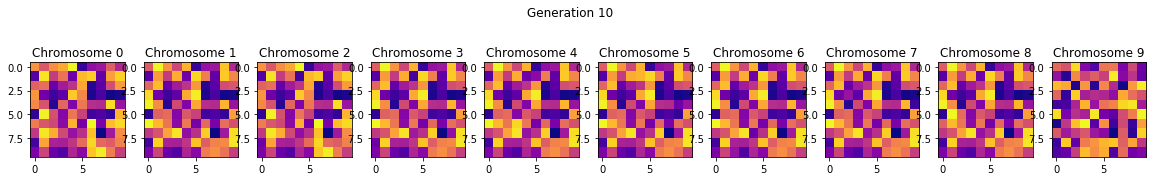

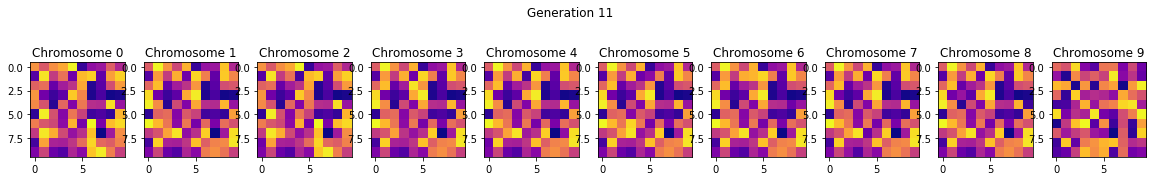

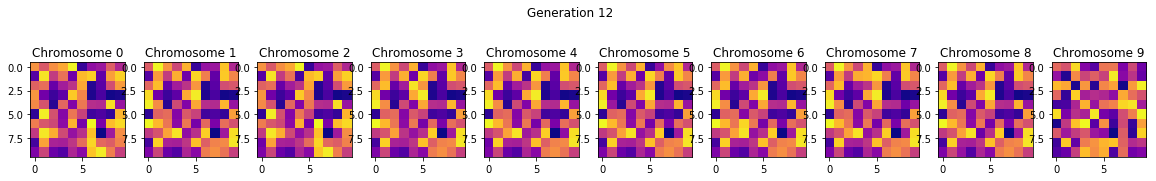

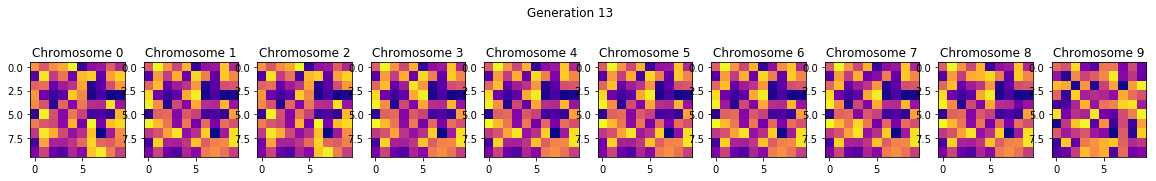

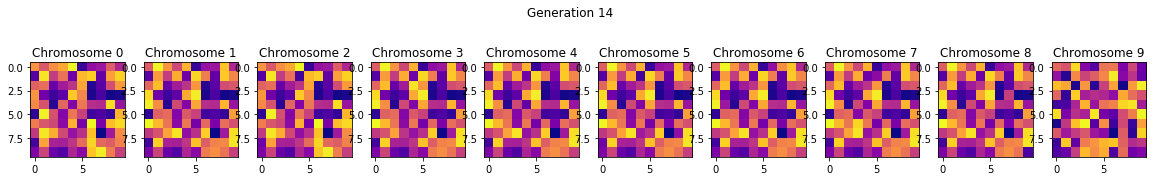

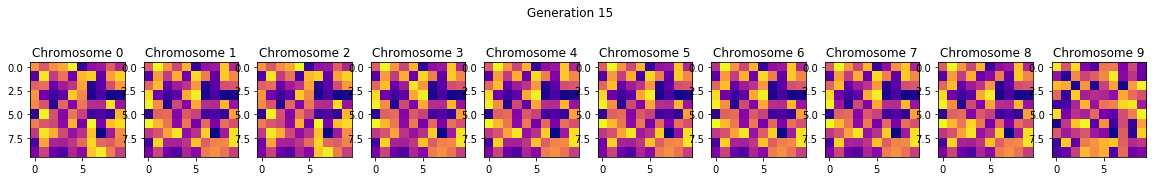

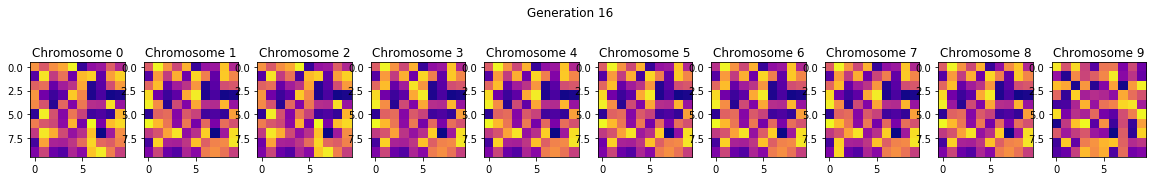

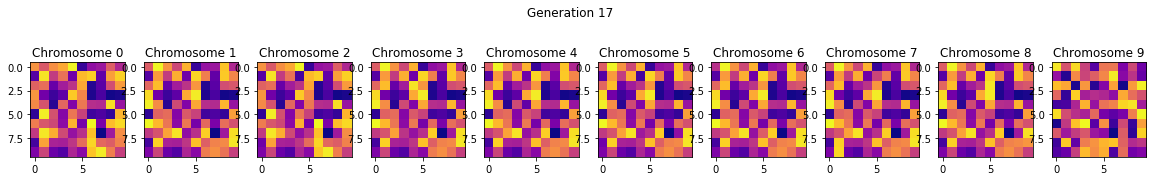

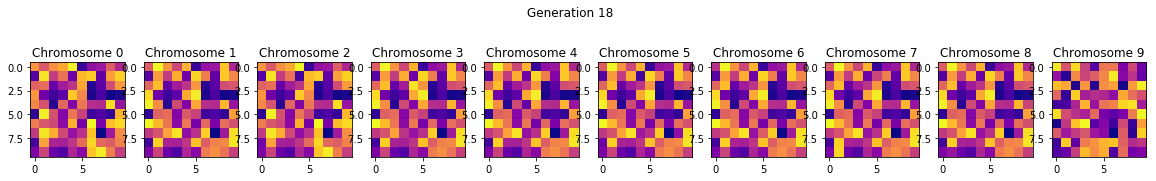

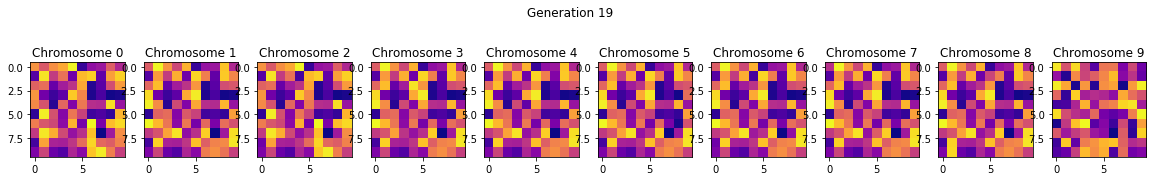

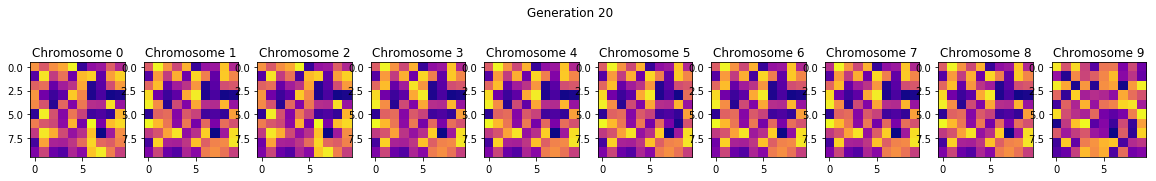

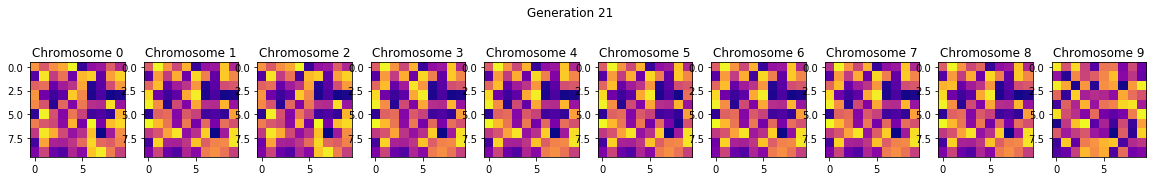

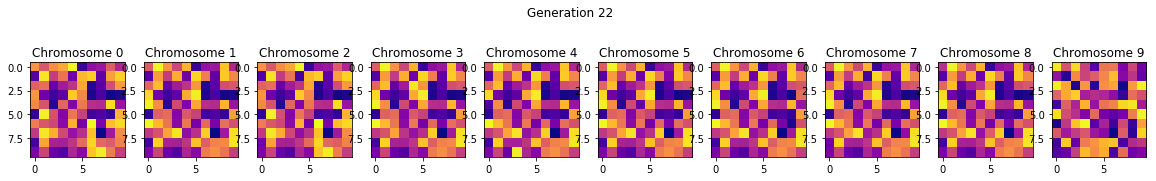

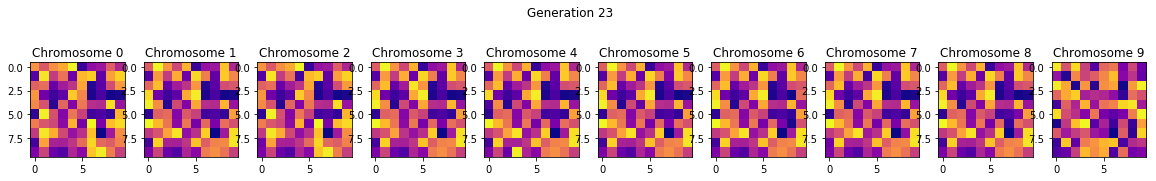

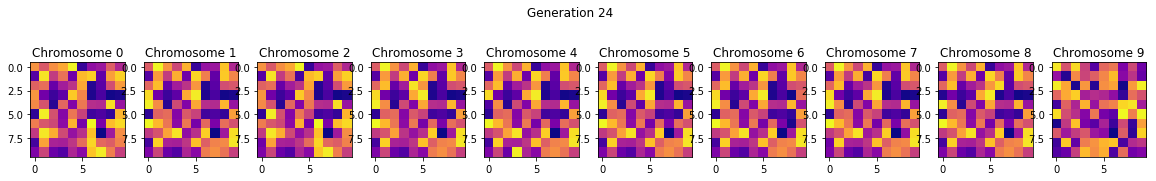

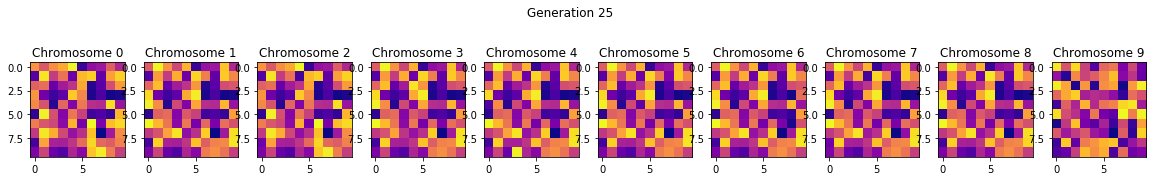

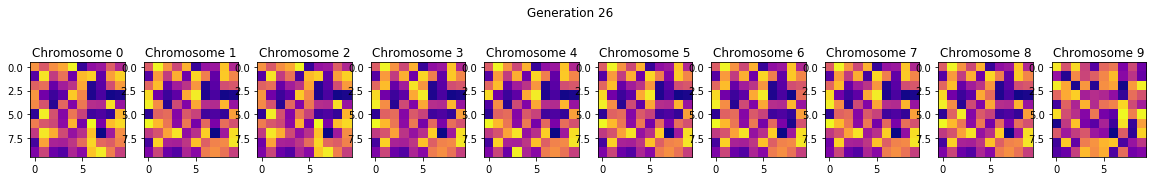

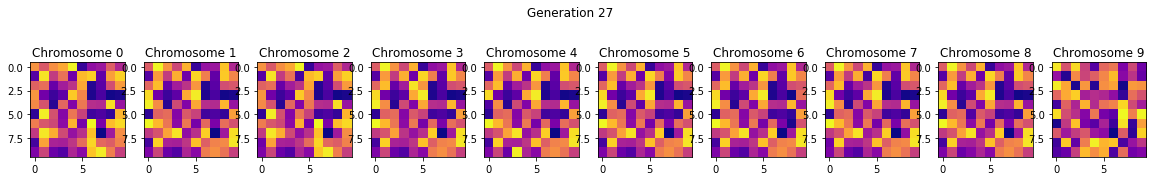

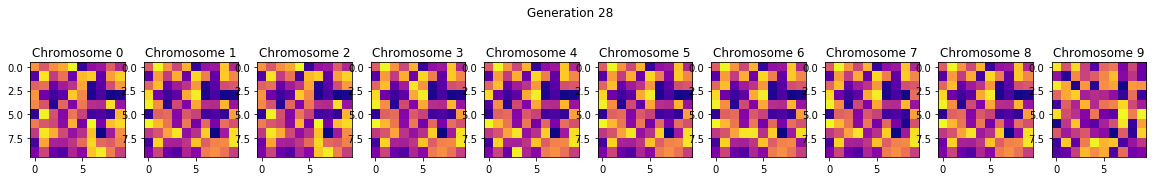

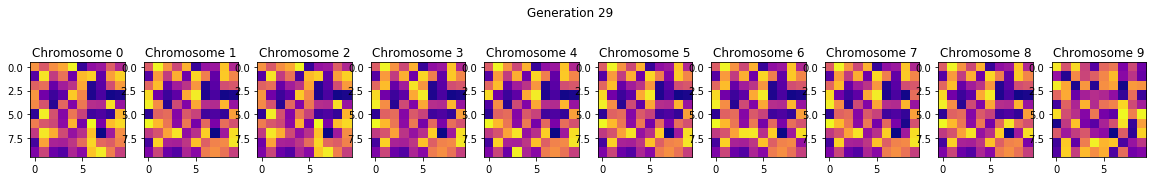

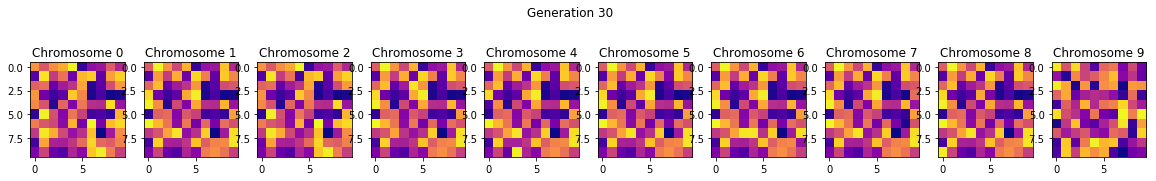

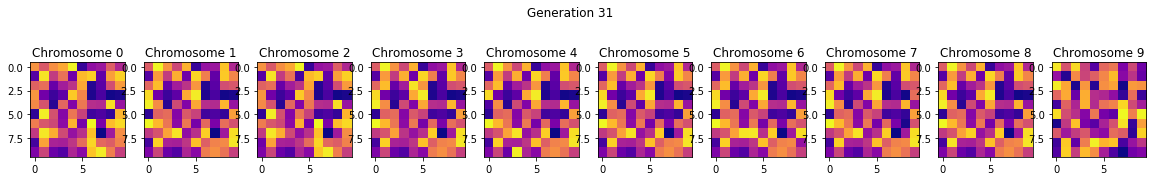

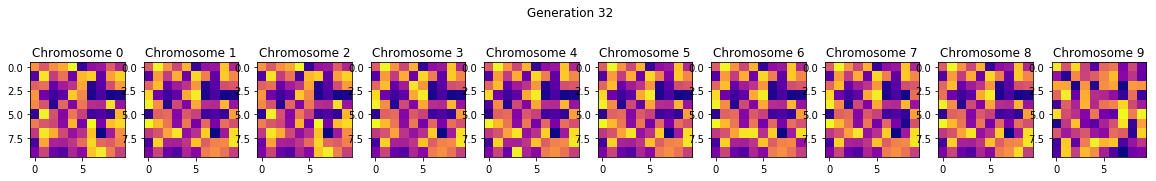

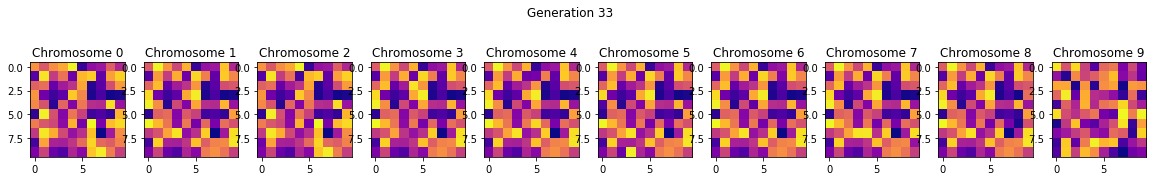

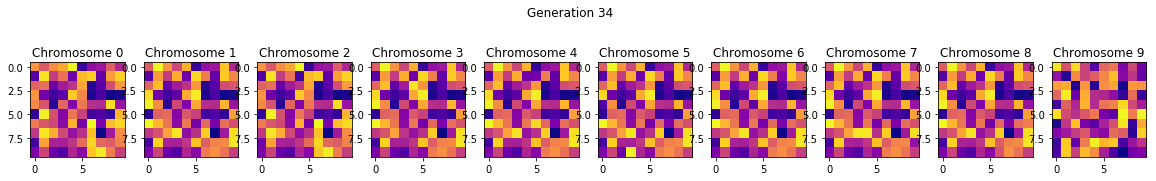

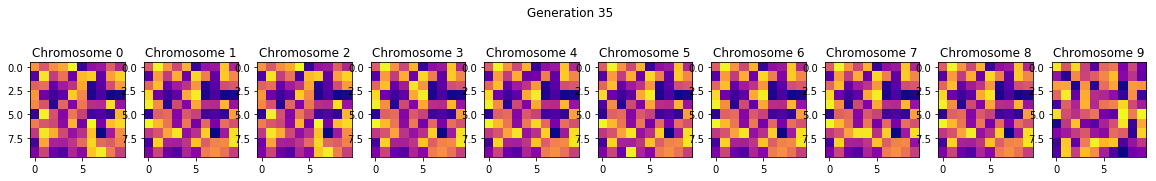

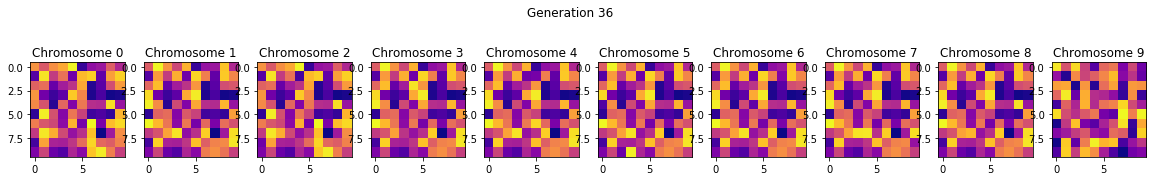

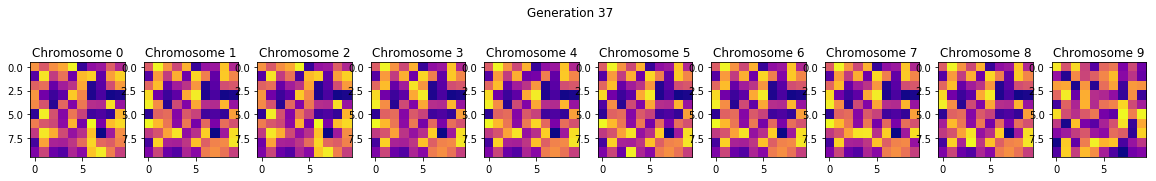

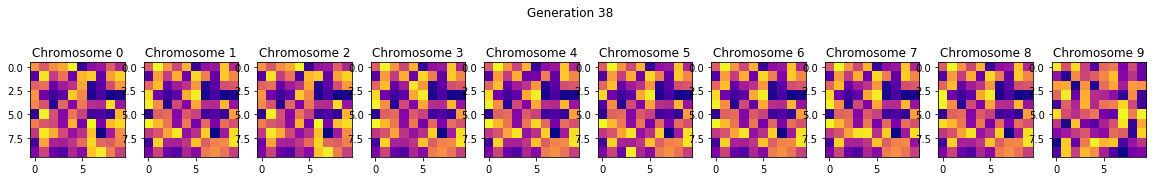

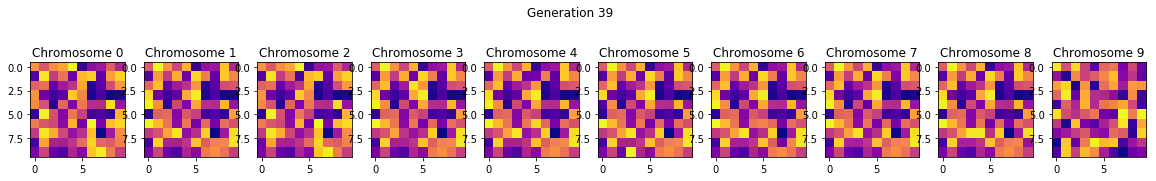

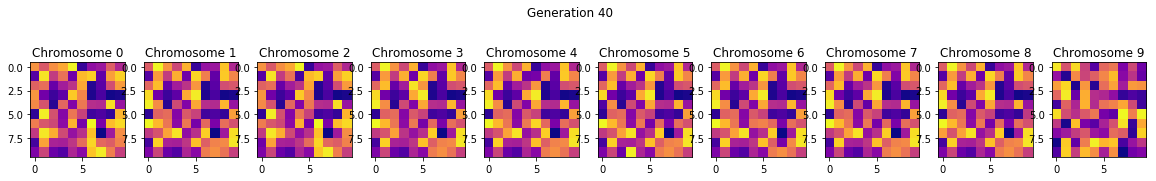

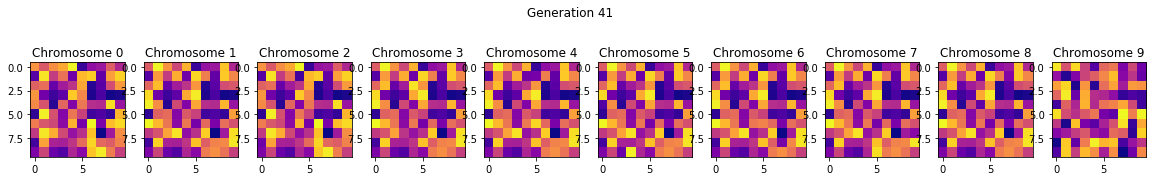

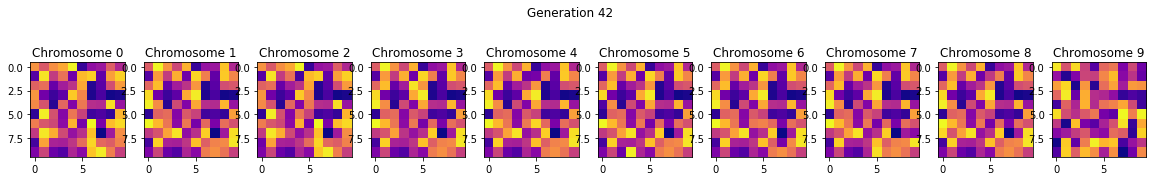

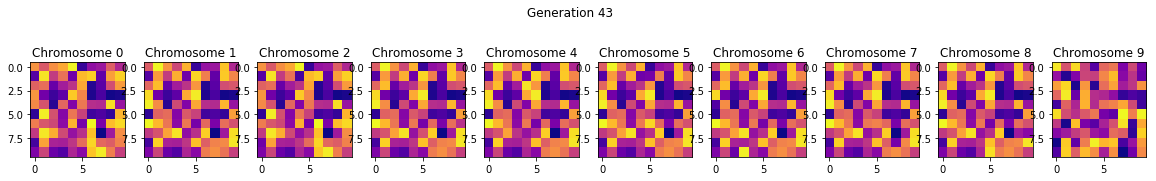

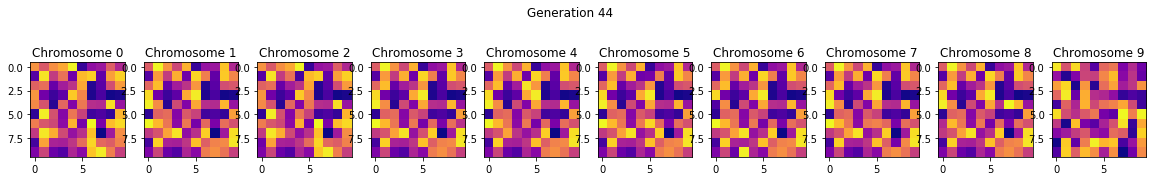

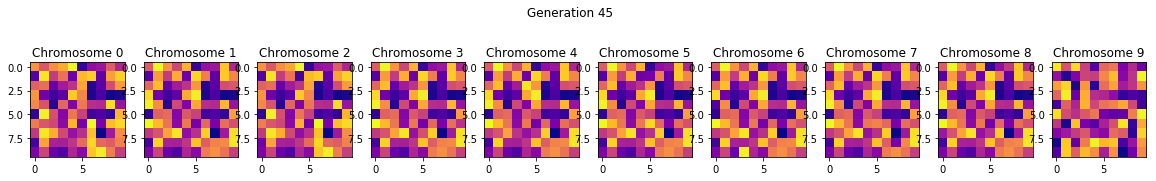

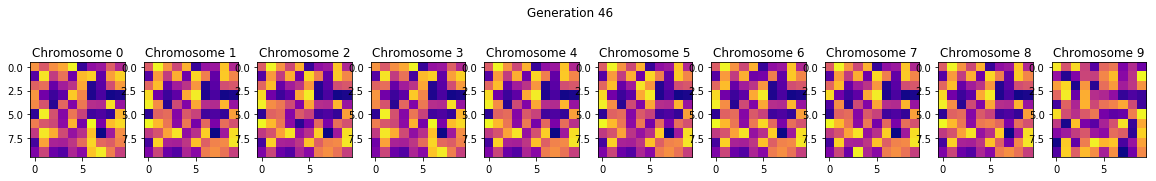

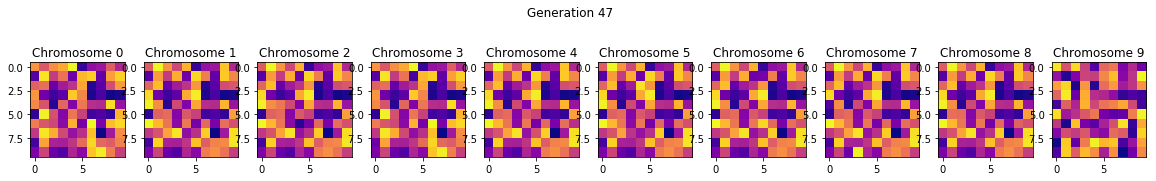

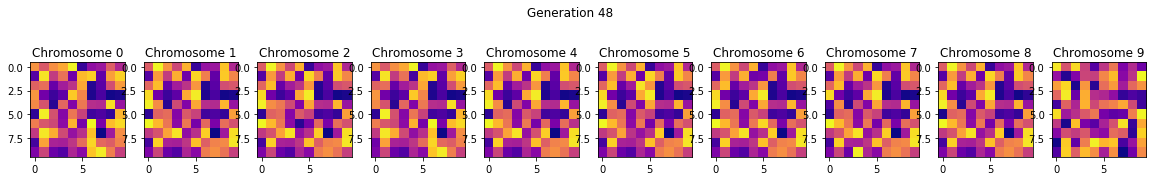

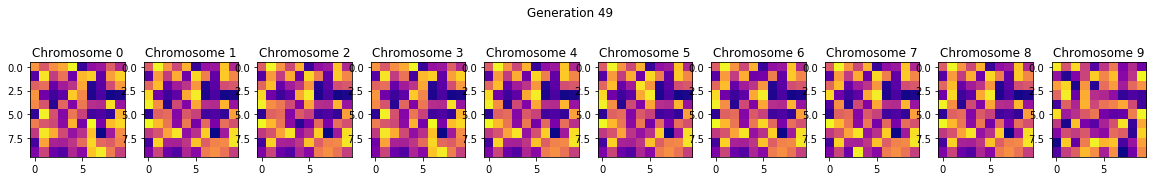

In [18]:

most_fit, fittest_chromosome = run_ga(generations)

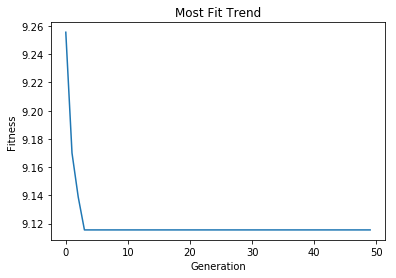

In [19]:

plt.plot(most_fit)
plt.title("Most Fit Trend")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [20]:
fittest_chromosome

array([[ 75.,  57.,  74.,  81.,  99.,   9.,  31.,  34.,  59.,  40.],
       [ 16.,  95.,  47.,  65.,  22.,  85.,  90.,  19.,  78.,  91.],
       [ 60.,  64.,  20.,  36.,  44.,  80.,   5.,  17.,  53.,  77.],
       [ 76.,  23.,  10.,  18.,  89.,  71.,   4.,  13.,   2.,   3.],
       [ 72.,  55.,   6.,  61.,  27.,  67.,  42.,  41.,  94.,  33.],
       [  7.,  98.,  54.,  28.,  66.,  49.,  11.,  14.,   8.,  84.],
       [ 68.,  56.,  51.,  30.,  83.,  24., 100.,  25.,  86.,  93.],
       [ 46.,  96.,  82.,  52.,  32.,  43.,  87.,   1.,  35.,  73.],
       [ 12.,  79.,  38.,  37.,  45.,  63.,  92.,  62.,  58.,  70.],
       [ 26.,  50.,  21.,  15.,  39.,  29.,  88.,  97.,  69.,  48.]])